In [1]:
import pandas as pd

In [8]:
read_csv = pd.read_csv('missing_coure_revenue.csv')
read_csv

,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,"$110,000","$11,000,000","$10,000,000"
1,"$385,907",$0,$0
2,"$200,000","$8,000,000","$8,000,000"
3,"$100,000","$3,000,000","$3,000,000"
4,"$245,000","$22,000,000","$11,000,000"
...,...,...,...
5386,"$15,000,000",$0,$0
5387,"$160,000,000",$0,$0
5388,"$175,000,000",$0,$0
5389,"$50,000,000",$0,$0


In [9]:
# rename headers
read_csv = read_csv.rename(columns={
    'Production Budget ($)': 'production_budget',
    'Worldwide Gross ($)': 'worldwide_gross',
    'Domestic Gross ($)': 'domestic_gross'
})
read_csv

,production_budget,worldwide_gross,domestic_gross
0,"$110,000","$11,000,000","$10,000,000"
1,"$385,907",$0,$0
2,"$200,000","$8,000,000","$8,000,000"
3,"$100,000","$3,000,000","$3,000,000"
4,"$245,000","$22,000,000","$11,000,000"
...,...,...,...
5386,"$15,000,000",$0,$0
5387,"$160,000,000",$0,$0
5388,"$175,000,000",$0,$0
5389,"$50,000,000",$0,$0


In [11]:
# Remove the '$' and commas, and convert to float
read_csv['production_budget'] = read_csv['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
read_csv['worldwide_gross'] = read_csv['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
read_csv['domestic_gross'] = read_csv['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
read_csv

,production_budget,worldwide_gross,domestic_gross
0,110000.0,11000000.0,10000000.0
1,385907.0,0.0,0.0
2,200000.0,8000000.0,8000000.0
3,100000.0,3000000.0,3000000.0
4,245000.0,22000000.0,11000000.0
...,...,...,...
5386,15000000.0,0.0,0.0
5387,160000000.0,0.0,0.0
5388,175000000.0,0.0,0.0
5389,50000000.0,0.0,0.0


In [12]:
read_csv.describe()

,production_budget,worldwide_gross,domestic_gross
count,5.391000e+03,5.391000e+03,5.391000e+03
mean,3.111374e+07,8.885542e+07,4.123552e+07
std,4.052380e+07,1.684578e+08,6.602935e+07
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,3.865206e+06,1.330902e+06
50%,1.700000e+07,2.745045e+07,1.719220e+07
75%,4.000000e+07,9.645446e+07,5.234369e+07
max,4.250000e+08,2.783919e+09,9.366622e+08


In [13]:
read_csv.mean()

production_budget    3.111374e+07
worldwide_gross      8.885542e+07
domestic_gross       4.123552e+07
dtype: float64

In [14]:
read_csv.median()

production_budget    17000000.0
worldwide_gross      27450453.0
domestic_gross       17192205.0
dtype: float64

In [15]:
read_csv.mode()

,production_budget,worldwide_gross,domestic_gross
0,20000000.0,0.0,0.0


<Axes: >

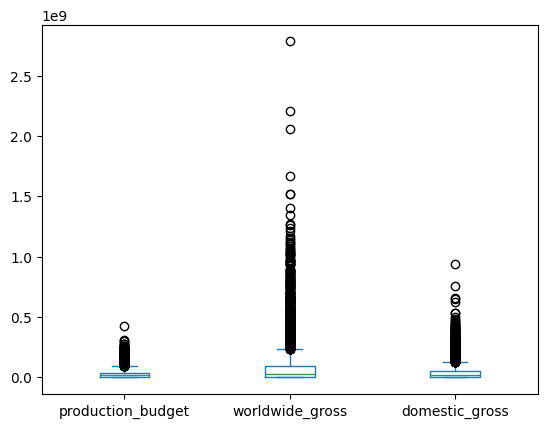

In [16]:
read_csv.plot(kind='box')

In [29]:
domestic_gross = read_csv[read_csv['domestic_gross'] == 0.0]

# Remove rows where any of the specified columns have 0.0
cleaned_data = read_csv[(read_csv['production_budget'] != 0.0) & 
                        (read_csv['worldwide_gross'] != 0.0) & 
                        (read_csv['domestic_gross'] != 0.0)]

print("Data after removing rows with 0.0 values:")
print(cleaned_data)



Data after removing rows with 0.0 values:
      production_budget  worldwide_gross  domestic_gross
0              110000.0       11000000.0      10000000.0
2              200000.0        8000000.0       8000000.0
3              100000.0        3000000.0       3000000.0
4              245000.0       22000000.0      11000000.0
5             3900000.0        9000000.0       9000000.0
...                 ...              ...             ...
5378         55000000.0      376856949.0     114434010.0
5379         40000000.0      166893990.0      92029184.0
5380        185000000.0      561137727.0     168052812.0
5381        175000000.0      140012608.0      39175066.0
5382         42000000.0       57850343.0      45850343.0

[4879 rows x 3 columns]


In [34]:
read_csv['production_budget'].replace(0.0, read_csv['production_budget'].median())

0          110000.0
1          385907.0
2          200000.0
3          100000.0
4          245000.0
           ...     
5386     15000000.0
5387    160000000.0
5388    175000000.0
5389     50000000.0
5390     20000000.0
Name: production_budget, Length: 5391, dtype: float64

In [35]:
read_csv['worldwide_gross'].replace(0.0, read_csv['worldwide_gross'].median())

0       11000000.0
1       27450453.0
2        8000000.0
3        3000000.0
4       22000000.0
           ...    
5386    27450453.0
5387    27450453.0
5388    27450453.0
5389    27450453.0
5390    27450453.0
Name: worldwide_gross, Length: 5391, dtype: float64

In [37]:
import math
read_csv['worldwide_gross'] = read_csv['worldwide_gross'].replace(0.0, read_csv['worldwide_gross'].median())
read_csv['worldwide_gross']= read_csv['worldwide_gross'].apply(lambda x: math.log10(x)) # log transformation

In [38]:
read_csv['worldwide_gross']

0       7.041393
1       7.438550
2       6.903090
3       6.477121
4       7.342423
          ...   
5386    7.438550
5387    7.438550
5388    7.438550
5389    7.438550
5390    7.438550
Name: worldwide_gross, Length: 5391, dtype: float64

<Axes: >

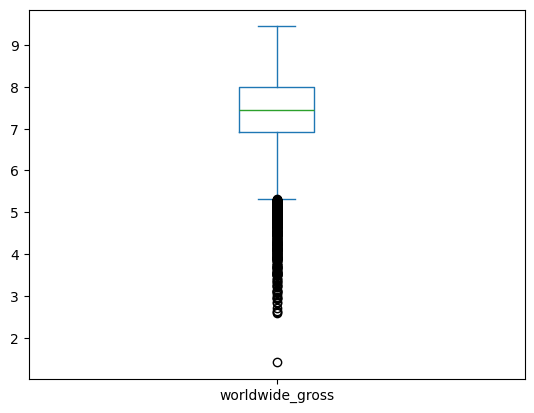

In [39]:
read_csv['worldwide_gross'].plot(kind='box')